<a href="https://colab.research.google.com/github/Glamorous9754/Practice-in-Jupyter/blob/main/Final%20Project%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. My Views About the Problem Statement

   I found the problem statement challenging and interesting. It required not only the implementation of various machine learning models but also a deep dive into the nuances of data preprocessing and handling outliers. The need to optimize the models and compare their performances added a practical dimension to the project, making it a valuable learning experience.

### 2. My Approach to Solving This Task

   - **Data Preprocessing:** Handling missing values, detecting, and addressing outliers, and scaling features.
   - **Model Implementation:** Implementing various machine learning models, including Linear Regression, Ridge Regression, Lasso Regression, Random Forest, KNN, XGBoost, and AdaBoost.
   - **Model Optimization:** Using Grid Search for hyperparameter tuning and evaluating models based on R² scores.
   - **Evaluation:** Comparing models based on their performance on training and testing data, specifically focusing on R² scores.

### 3. Available ML Model Options I Had to Perform This Task

   - **Linear Models:** Including Linear Regression with single and multiple features, Ridge, and Lasso Regression.
   - **Tree-based Models:** Random Forest and XGBoost, which are generally robust to overfitting.
   - **Instance-based Learning:** K-Nearest Neighbors (KNN), which relies on distance metrics.
   - **Ensemble Methods:** AdaBoost, which combines multiple weak learners to create a strong learner.
   I also explored model optimization techniques such as Grid Search to fine-tune these models for better performance.

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

## Data Collection

In [93]:
url = 'https://raw.githubusercontent.com/Glamorous9754/Practice-in-Jupyter/main/Data%20Files/ML%20case%20Study.csv'
ml_case_study = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/Glamorous9754/Practice-in-Jupyter/main/Data%20Files/Colleges.csv'
colleges = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/Glamorous9754/Practice-in-Jupyter/main/Data%20Files/cities.csv'
cities = pd.read_csv(url)


In [94]:
Tire1 = colleges['Tier 1'].tolist()
Tire2 = colleges['Tier 2'].tolist()
Tire3 = colleges['Tier 3'].tolist()

metro = cities["Metrio City"].tolist()
nonmetro=cities["non-metro cities"].tolist()



for i in ml_case_study.College:
    if i in Tire1:
        ml_case_study["College"].replace(i,"Tire1",inplace=True)
    elif i in Tire2:
        ml_case_study["College"].replace(i,"Tire2",inplace=True)
    elif i in Tire3:
        ml_case_study["College"].replace(i,"Tire3",inplace=True)

for c in ml_case_study.City:
    if c in metro:
        ml_case_study["City"].replace(c,'Metro',inplace=True)
    elif c in nonmetro:
        ml_case_study["City"].replace(c,'Non_Metro',inplace=True)

df = ml_case_study
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,Tire2,Non_Metro,Manager,55523.0,3,66,19,71406.58
1,Tire2,Non_Metro,Executive,57081.0,1,84,18,68005.87
2,Tire3,Non_Metro,Executive,60347.0,2,52,28,76764.02
3,Tire3,Non_Metro,Executive,49010.0,2,81,33,82092.39
4,Tire1,Non_Metro,Executive,57879.0,4,74,32,73878.10


## Data Cleaning And Data Transformation

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


* Data seems to have no missing values.

In [96]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


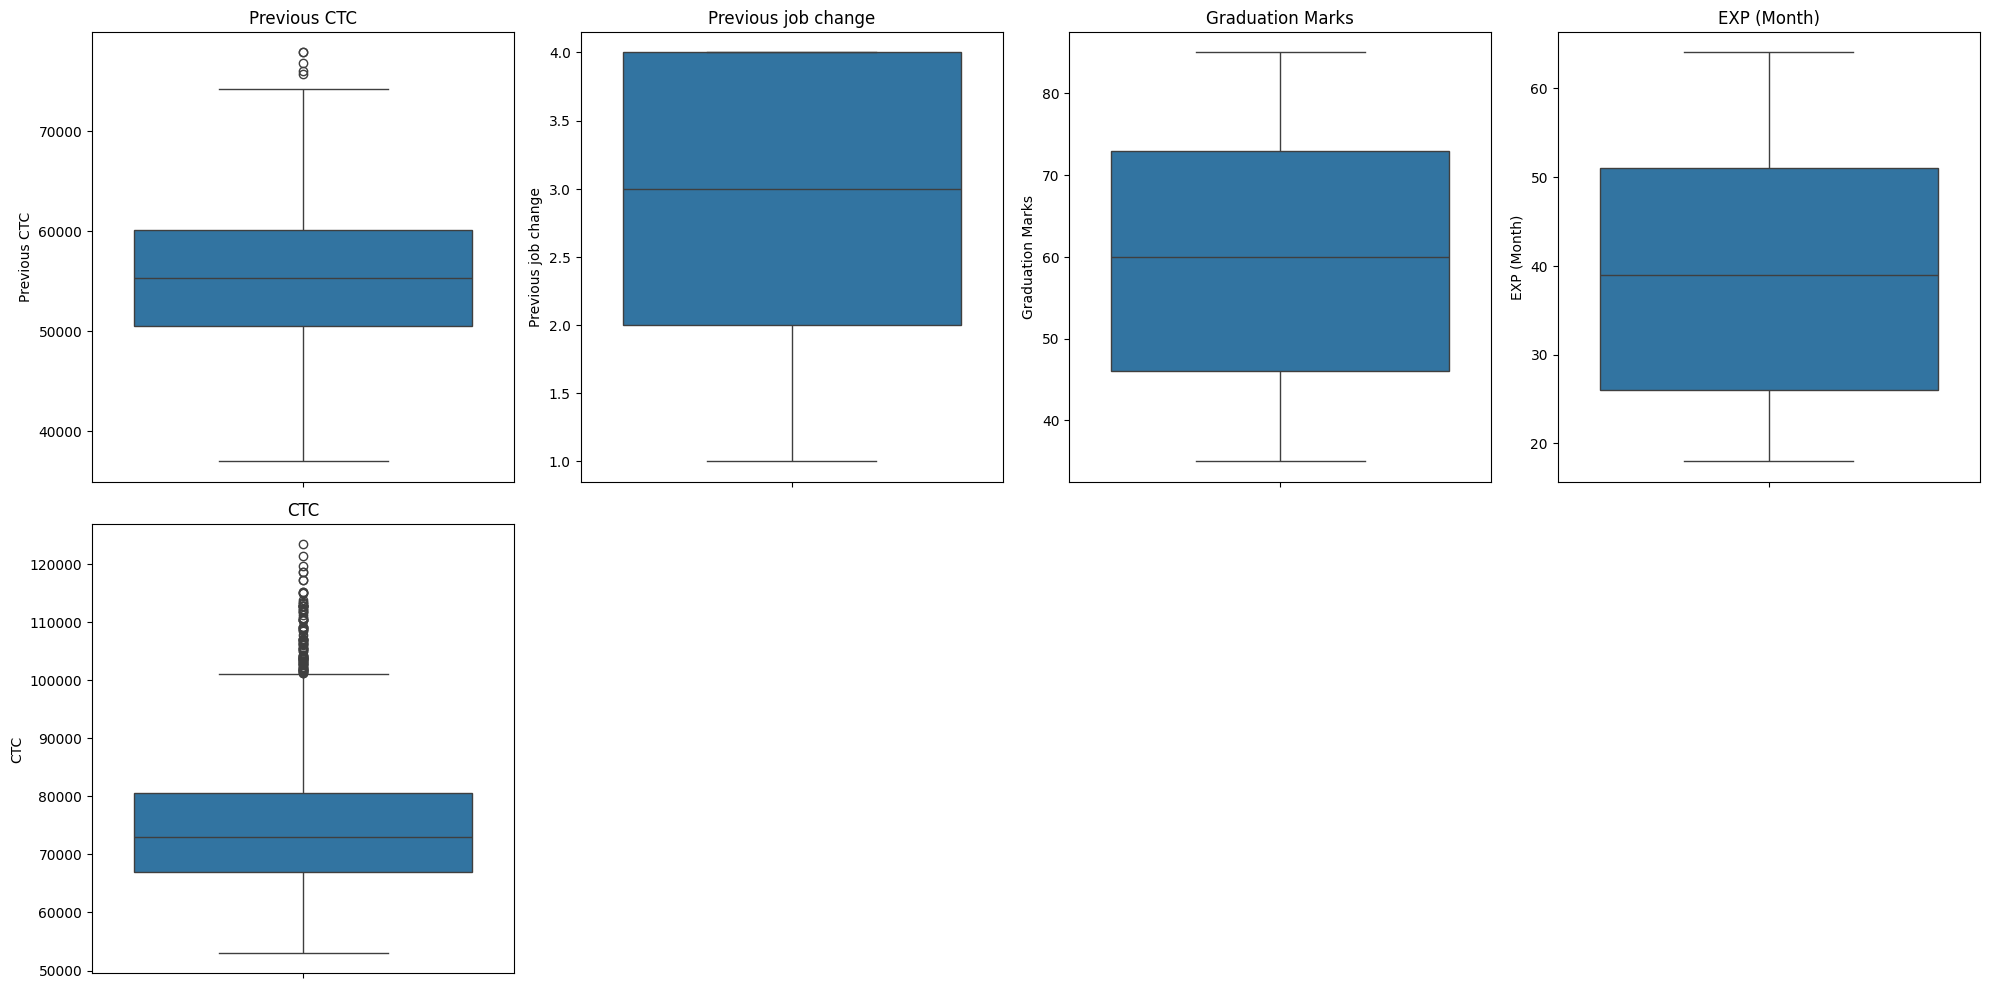

In [97]:
dfy= df.drop(['Role','College','City'],axis=1)
Q1 = dfy.quantile(0.25)
Q3 = dfy.quantile(0.75)
IQR = Q3 - Q1

outliers = ((dfy < (Q1 - 1.5 * IQR)) |(dfy > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices = dfy[outliers].index

outliers_count = outliers.sum()
# outliers_count

plt.figure(figsize=(20,10))
for i,column in enumerate(dfy.columns,1):
    plt.subplot(2,4,i)
    sns.boxplot(data=dfy[column])
    plt.title(column)
plt.tight_layout()
plt.show()

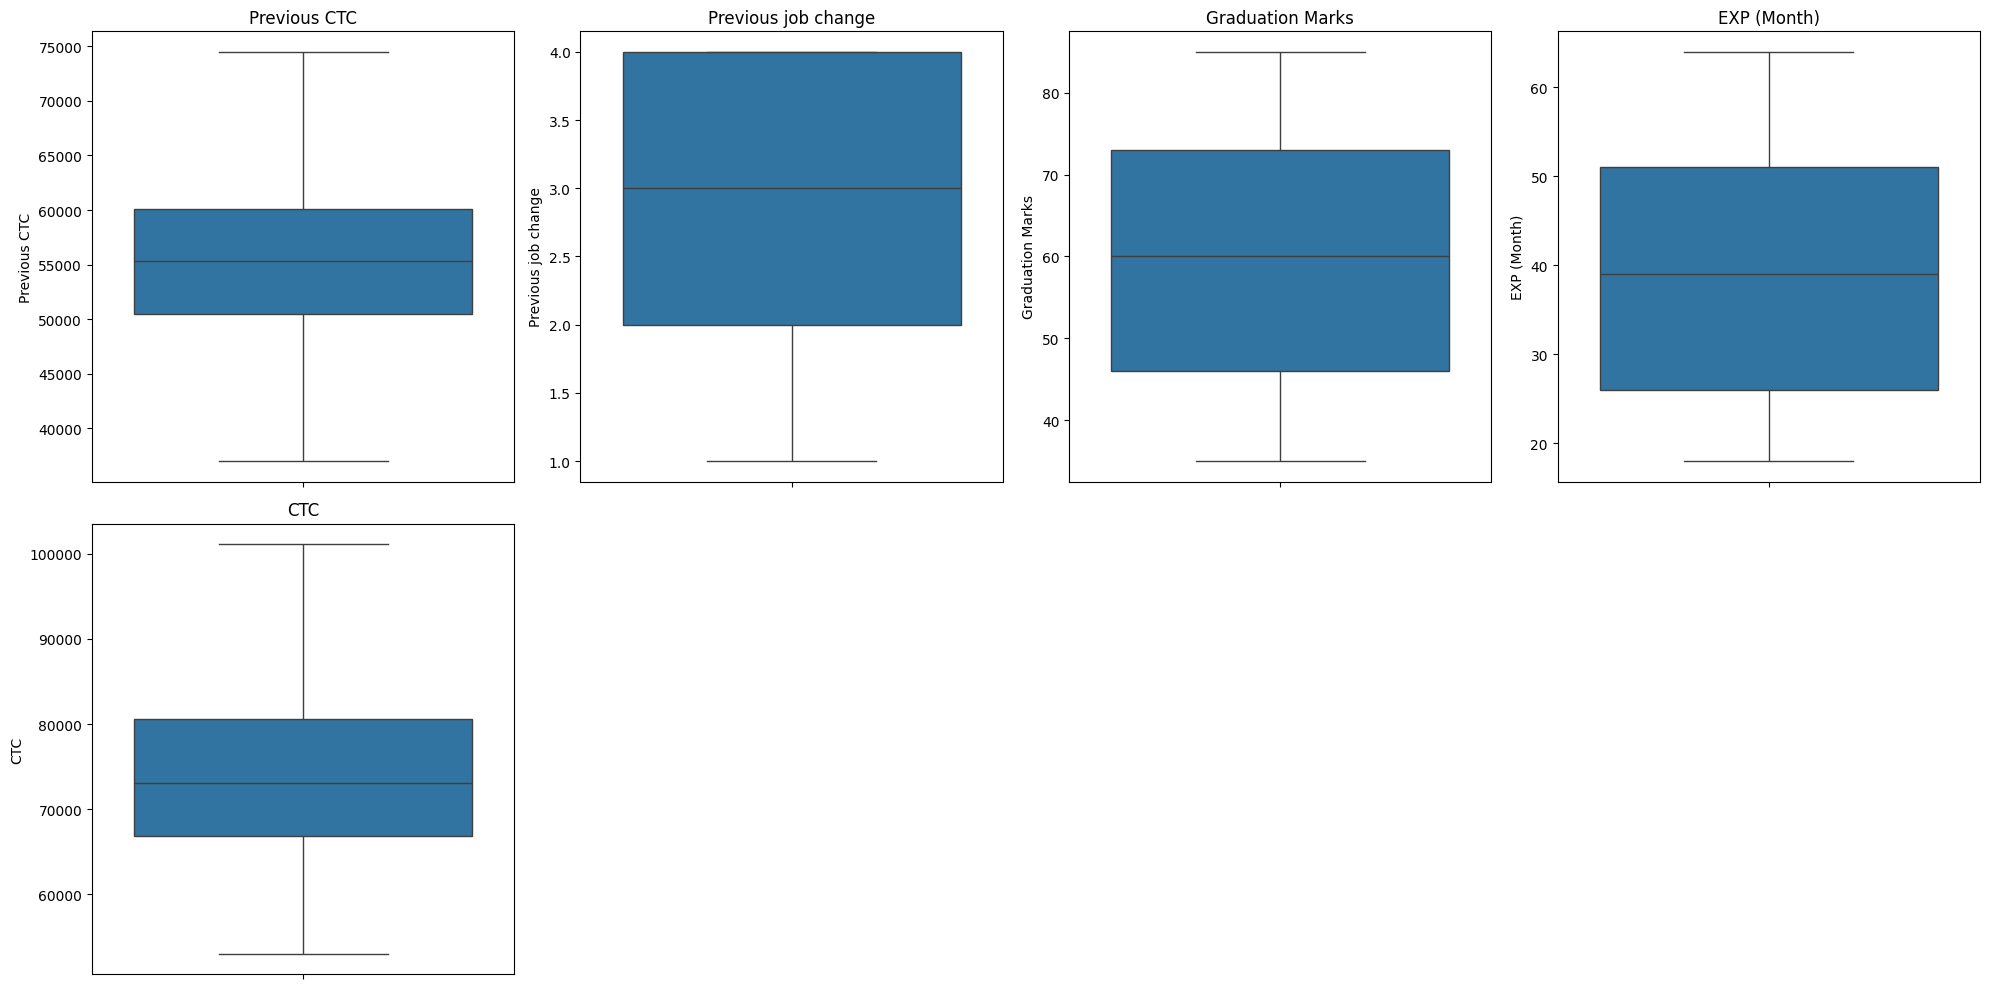

In [98]:
df_filtered = dfy.copy()

for feature in Q1.index:
    LB = Q1[feature] - 1.5 * IQR[feature]
    UB = Q3[feature] + 1.5 * IQR[feature]
    df_filtered[feature] = df_filtered[feature].clip(lower=LB, upper=UB)

plt.figure(figsize=(20,10))
for i,column in enumerate(df_filtered.columns,1):
    plt.subplot(2,4,i)
    sns.boxplot(data=df_filtered[column])
    plt.title(column)
plt.tight_layout()
plt.show()

* Data seems to have some outliers in the 'Previous CTC' and 'CTC' column.
* I prefer to run some models with those outliers first.

In [99]:
df_filtered['College'] = df['College']
df_filtered['Role'] = df['Role']
df_filtered['City'] = df['City']
df = df_filtered

In [100]:
df = pd.get_dummies(df, columns = ['College','Role','City'],drop_first= True)
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tire2,College_Tire3,Role_Manager,City_Non_Metro
0,55523.0,3,66,19,71406.58,True,False,True,True
1,57081.0,1,84,18,68005.87,True,False,False,True
2,60347.0,2,52,28,76764.02,False,True,False,True
3,49010.0,2,81,33,82092.39,False,True,False,True
4,57879.0,4,74,32,73878.10,False,False,False,True


## Data Correlation

In [101]:
df_corr = df.corr()
CTC_corr = df_corr.CTC.drop(['CTC'],axis=0)
CTC_corr

,CTC
Previous CTC,0.246917
Previous job change,0.009485
Graduation Marks,-0.004665
EXP (Month),0.310451
College_Tire2,0.009366
College_Tire3,-0.027470
Role_Manager,0.611024
City_Non_Metro,0.026940


* There is a chance that Graduation Marks will not effect the CTC too much
* There is high chance that being a Manager, or havign a lot of experience or having high previous ctc may suggest good CTC

## Dependent(y) and Independent(x) Variable Creation

In [102]:
x = df.drop(['CTC'],axis=1).astype(float)
y = df['CTC'].astype(float)

## Prediction Models

### Linear Regression

#### Linear Regression model using single highest correlated field.

In [103]:
x_one = df[['Role_Manager']]

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_one, y, test_size=0.2, random_state=0)
lm_reg_1 = LinearRegression()
lm_reg_1.fit(x_train, y_train)

LinearRegression()

In [105]:
print("The R2 Score for the traing data: ",r2_score(y_train,lm_reg_1.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(y_test,lm_reg_1.predict(x_test)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,lm_reg_1.predict(x_train)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,lm_reg_1.predict(x_test)))

The R2 Score for the traing data:  0.3651335343328055
The R2 Score for the testing data:  0.4063894714729136


#### Linear Regression model using multiple fields

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lm_reg_m = LinearRegression()
lm_reg_m.fit(x_train, y_train)

LinearRegression()

In [107]:
print("The R2 Score for the traing data: ",r2_score(y_train,lm_reg_m.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(y_test,lm_reg_m.predict(x_test)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,lm_reg_m.predict(x_train)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,lm_reg_m.predict(x_test)))

The R2 Score for the traing data:  0.5191525943476509
The R2 Score for the testing data:  0.5319130187832997


### Ridge Regression

In [108]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
x_train_s = sc.transform(x_train)
x_test_s = sc.transform(x_test)

In [109]:
from sklearn.linear_model import Ridge
lm_reg_ridge = Ridge(alpha=0.5)
lm_reg_ridge.fit(x_train_s, y_train)

Ridge(alpha=0.5)

In [110]:
print("The R2 Score for the traing data: ",r2_score(y_train,lm_reg_ridge.predict(x_train_s)))
print("The R2 Score for the testing data: ",r2_score(y_test,lm_reg_ridge.predict(x_test_s)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,lm_reg_ridge.predict(x_train_s)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,lm_reg_ridge.predict(x_test_s)))

The R2 Score for the traing data:  0.5191525186487738
The R2 Score for the testing data:  0.5318862177024227


* Used multiple alpha values but the R2 Scores remains almost same.

### Lasso Regression

In [111]:
from sklearn.linear_model import Lasso
lm_reg_lasso = Lasso(alpha=0.5)
lm_reg_lasso.fit(x_train_s, y_train)

Lasso(alpha=0.5)

In [112]:
print("The R2 Score for the traing data: ",r2_score(y_train,lm_reg_lasso.predict(x_train_s)))
print("The R2 Score for the testing data: ",r2_score(y_test,lm_reg_lasso.predict(x_test_s)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,lm_reg_lasso.predict(x_train_s)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,lm_reg_lasso.predict(x_test_s)))

The R2 Score for the traing data:  0.5191525809235966
The R2 Score for the testing data:  0.5319164310141142


* Used multiple alpha values but the R2 Scores remains almost same.

### Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=1000,n_jobs=-1,random_state=0)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [114]:
print("The R2 Score for the traing data: ",r2_score(y_train,rf_regressor.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(y_test,rf_regressor.predict(x_test)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,rf_regressor.predict(x_train)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,rf_regressor.predict(x_test)))

The R2 Score for the traing data:  0.9460219684986738
The R2 Score for the testing data:  0.6590808704975257


#### Grid Search

In [115]:
from sklearn.model_selection import GridSearchCV

rf_regressor = RandomForestRegressor(n_jobs=-1,random_state=0)
param = {'max_depth':range(3,11,2),'min_samples_leaf':[2,3,4],'n_estimators':[1000,750]}
grid_search = GridSearchCV(rf_regressor,scoring='neg_mean_absolute_error',cv=5,param_grid=param)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid={'max_depth': range(3, 11, 2),
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [1000, 750]},
             scoring='neg_mean_absolute_error')

In [116]:
print("The R2 Score for the traing data: ",r2_score(y_train,grid_search.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(y_test,grid_search.predict(x_test)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,grid_search.predict(x_train)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,grid_search.predict(x_test)))

The R2 Score for the traing data:  0.8221661792581431
The R2 Score for the testing data:  0.6426592222142162


### K - Nearest Neighbors (KNN)

In [117]:
from sklearn.neighbors import KNeighborsRegressor
lrg_knn = KNeighborsRegressor(n_neighbors=20,n_jobs=-1)
lrg_knn.fit(x_train_s, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=20)

In [118]:
print("The R2 Score for the traing data: ",r2_score(y_train,lrg_knn.predict(x_train_s)))
print("The R2 Score for the testing data: ",r2_score(y_test,lrg_knn.predict(x_test_s)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,rg_knn.predict(x_train_s)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,rg_knn.predict(x_test_s)))

The R2 Score for the traing data:  0.5538906497223286
The R2 Score for the testing data:  0.5370004533215423


#### Grid Search

In [119]:
from sklearn.model_selection import GridSearchCV

lrg_knn = KNeighborsRegressor(n_jobs=-1)
param = {'n_neighbors':range(1,55)}
grid_search = GridSearchCV(lrg_knn,param_grid=param)

grid_search.fit(x_train_s,y_train)

GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1),
             param_grid={'n_neighbors': range(1, 55)})

In [120]:
print(grid_search.best_params_)
opttimized_grid = grid_search.best_estimator_

{'n_neighbors': 20}


In [121]:
print("The R2 Score for the traing data: ",r2_score(y_train,opttimized_grid.predict(x_train_s)))
print("The R2 Score for the testing data: ",r2_score(y_test,opttimized_grid.predict(x_test_s)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,opttimized_grid.predict(x_train_s)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,opttimized_grid.predict(x_test_s)))

The R2 Score for the traing data:  0.5538906497223286
The R2 Score for the testing data:  0.5370004533215423


### XG Boost

In [122]:
# pip install xgboost

In [123]:
import xgboost as xgb

xgb_lrg = xgb.XGBRegressor(max_depth = 5,n_estimators = 10000, learning_rate = 0.3)
xgb_lrg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [124]:
print("The R2 Score for the traing data: ",r2_score(y_train,xgb_lrg.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(y_test,xgb_lrg.predict(x_test)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,xgb_lrg.predict(x_train)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,xgb_lrg.predict(x_test)))

The R2 Score for the traing data:  0.9999999999880768
The R2 Score for the testing data:  0.5988765714805082


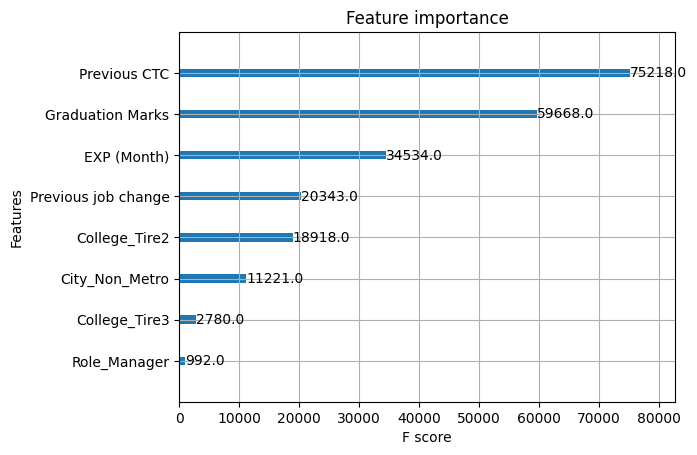

In [125]:
xgb.plot_importance(xgb_lrg)
plt.show()

### AdaBoost

In [126]:
from sklearn.ensemble import AdaBoostRegressor

ada_lrg = AdaBoostRegressor(random_state=0,n_estimators=5000,learning_rate=0.02)
ada_lrg.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.02, n_estimators=5000, random_state=0)

In [127]:
print("The R2 Score for the traing data: ",r2_score(y_train,ada_lrg.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(y_test,ada_lrg.predict(x_test)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,ada_lrg.predict(x_train)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,ada_lrg.predict(x_test)))

The R2 Score for the traing data:  0.5879749605852811
The R2 Score for the testing data:  0.5914037091532521


In [128]:
ada_lrg2 = AdaBoostRegressor(rf_regressor,random_state=0,learning_rate=0.05,n_estimators=500)
ada_lrg2.fit(x_train,y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                  learning_rate=0.05, n_estimators=500, random_state=0)

In [129]:
print("The R2 Score for the traing data: ",r2_score(y_train,ada_lrg2.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(y_test,ada_lrg2.predict(x_test)))
# print("The Mean Squared Error for the traing data: ",mean_squared_error(y_train,ada_lrg2.predict(x_train)))
# print("The Mean Squared Error for the testing data: ",mean_squared_error(y_test,ada_lrg2.predict(x_test)))

The R2 Score for the traing data:  0.9716968170015683
The R2 Score for the testing data:  0.664147031444867


1. **Linear Regression model using a single highest correlated field:**
   - Training Data R²: 0.3651
   - Testing Data R²: 0.4064

2. **Linear Regression model using multiple fields:**
   - Training Data R²: 0.5192
   - Testing Data R²: 0.5319

3. **Ridge Regression:**
   - Training Data R²: 0.5192
   - Testing Data R²: 0.5319

4. **Lasso Regression:**
   - Training Data R²: 0.5192
   - Testing Data R²: 0.5319

5. **Random Forest:**
   - Training Data R²: 0.9460
   - Testing Data R²: 0.6591

6. **Random Forest with Grid Search:**
   - Training Data R²: 0.8222
   - Testing Data R²: 0.6427

7. **K-Nearest Neighbors (KNN):**
   - Training Data R²: 0.5539
   - Testing Data R²: 0.5370

8. **K-Nearest Neighbors (KNN) with Grid Search:**
   - Training Data R²: 0.5539
   - Testing Data R²: 0.5370

9. **XGBoost:**
   - Training Data R²: 1.0000
   - Testing Data R²: 0.5989

10. **AdaBoost:**
    - Training Data R²: 0.5880
    - Testing Data R²: 0.5914

11. **AdaBoost with Grid Search:**
    - Training Data R²: 0.9717
    - Testing Data R²: 0.6641

